# **Movies Analysis**

#### Step 1: **Introduction**
The primary aim of this project is to provide data-driven insights for a company looking to establish a new movie studio. With the entertainment industry evolving, the goal is to analyze existing film data to understand what types of movies perform best at the box office, helping the studio decide which genres, contributors, and themes to prioritize.


#### Step 2: **Business Problem**
The newly established movie studio, is keen to determine how to translate historical performance data into strategic decisions about film development, to produce content that is more likely to succeed commercially and meet audience demand. 
Despite being in a highly competitive industry, the movie studio lacks the data-driven insights needed to make informed decisions about which types of films to produce. Without understanding current trends in the movie market, including the genres, themes, budgets, cast, and production values that are most likely to succeed at the box office, the studio risks investing in film projects that may underperform or fail to attract audiences. The company is seeking to leverage data from multiple reputable sources (Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB, and The Numbers) to uncover actionable insights that will guide the creative, financial, and marketing decisions for the studio.

#### Step 3: **Objectives**
Our analysis will focus on the following objectives:

1. **Identify Popular Genres**: Analyze which genres tend to have higher ratings and more viewer engagement.
2. **Analyze Characteristics of High-Rated Movies**: Examine factors such as runtime, year of release, and genre combinations to see if they correlate with higher ratings.
3. **Determine Key Contributors**: Identify directors, writers, and actors who have contributed to successful movies, as potential partners for the new studio.
4. **Investigate Trends Over Time**: Look at how preferences in ratings, movie length, and genres have evolved over the years, highlighting trends that may be valuable for the new studio to consider.


#### Step 4: **Data Understanding**


**Key Questions for Data Understanding**:
- What is the distribution of genres in the dataset?
- Are there missing values in critical columns (e.g., ratings, genres, runtime)?
- How are ratings distributed across movies?
- What are the relationships between tables that can help us analyze contributor impact (e.g., directors, writers)?

In [3]:
#install all libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as st
import sqlite3
import zipfile
import os
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, TTestPower
import statsmodels.formula as smf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Define paths
zip_file_path = "C:\Projects\group3-phase2-project\data\im.db.zip"  
extracted_dir = "C:\Projects\group3-phase2-project\data\extracted"  

In [5]:
# Step 1: Unzip the file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extracted_dir)

In [6]:
# Define the path to the extracted database file
db_path = os.path.join(extracted_dir, "im.db")

In [7]:
# Step 2: Check if the database file exists and connect to it
if os.path.exists(db_path) and os.path.getsize(db_path) > 0:
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

In [8]:
# Step 3: Check if the database file exists and has a reasonable size
if os.path.exists(db_path) and os.path.getsize(db_path) > 0:
    print("Database file exists and is not empty. Proceeding with connection.")
    
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    
    # Step 3: Check tables in the database
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    
    if tables.empty:
        print("No tables found in the database. The database might be empty or corrupted.")
    else:
        print("Tables found:", tables)
else:
    print("Database file is either missing or empty.")

Database file exists and is not empty. Proceeding with connection.
Tables found:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [9]:
# Step 4: Load tables into DataFrames for analysis
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
principals = pd.read_sql_query("SELECT * FROM principals;", conn)
persons = pd.read_sql_query("SELECT * FROM persons;", conn)
known_for = pd.read_sql_query("SELECT * FROM known_for;", conn)
directors = pd.read_sql_query("SELECT * FROM directors;", conn)
writers = pd.read_sql_query("SELECT * FROM writers;", conn)
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas;", conn)

In [10]:
# Display brief info summary for each DataFrame
dataframes_info = {
        "movie_basics": movie_basics.info(),
        "movie_ratings": movie_ratings.info(),
        "principals": principals.info(),
        "persons": persons.info(),
        "known_for": known_for.info(),
        "directors": directors.info(),
        "writers": writers.info(),
        "movie_akas": movie_akas.info()
    }
    
dataframes_info  # This will display summaries for all loaded tables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entr

{'movie_basics': None,
 'movie_ratings': None,
 'principals': None,
 'persons': None,
 'known_for': None,
 'directors': None,
 'writers': None,
 'movie_akas': None}

In [11]:
# Inspect the movie_basics data and drop unnecessary columns
movie_basics.columns
movie_basics = pd.read_sql("""SELECT movie_id, primary_title, start_year, runtime_minutes, genres FROM movie_basics;""", conn)

# Inspect the directors data and drop unnecessary columns
directors.columns
directors = pd.read_sql("""SELECT movie_id, person_id FROM directors""", conn)

# Inspect the known_for data and drop unnecessary columns
known_for.columns
known_for = pd.read_sql("""SELECT person_id, movie_id FROM known_for""", conn)

# Inspect the movie_akas data and drop unnecessary columns
movie_akas.columns
movie_akas = pd.read_sql("""SELECT movie_id, title, region, language FROM movie_akas""", conn)

# Inspect the movie_ratings data and drop unnecessary columns
movie_ratings.columns
movie_ratings = pd.read_sql("""SELECT movie_id, averagerating, numvotes  FROM movie_ratings""", conn)

# Inspect the principals data and drop unnecessary columns
principals.columns
principals = pd.read_sql("""SELECT movie_id, person_id, category FROM principals""", conn)

# Inspect the persons data and drop unnecessary columns
persons.columns
persons = pd.read_sql("""SELECT person_id, primary_name FROM persons""", conn)

# Inspect the writers data and drop unnecessary columns
writers.columns
writers = pd.read_sql("""SELECT movie_id, person_id FROM writers""", conn)

In [12]:
# Identify unique movie_id and person_id values in the primary tables(movie_basics and persons) 
# Filter each table to only inlcude rows with valid movie_id and person_id 
# Create sets of unique movie and person IDs from primary tables
valid_movie_ids = set(movie_basics['movie_id'])
valid_person_ids = set(persons['person_id'])

# Directors: filter on movie_id and person_id
directors = directors[directors['movie_id'].isin(valid_movie_ids) & 
                      directors['person_id'].isin(valid_person_ids)]

# Known_for: filter on movie_id and person_id
known_for = known_for[known_for['movie_id'].isin(valid_movie_ids) & 
                      known_for['person_id'].isin(valid_person_ids)]

# Movie_akas: filter on movie_id only
movie_akas = movie_akas[movie_akas['movie_id'].isin(valid_movie_ids)]

# Movie_ratings: filter on movie_id only
movie_ratings = movie_ratings[movie_ratings['movie_id'].isin(valid_movie_ids)]

# Principals: filter on movie_id and person_id
principals = principals[principals['movie_id'].isin(valid_movie_ids) & 
                        principals['person_id'].isin(valid_person_ids)]

# Writers: filter on movie_id and person_id
writers = writers[writers['movie_id'].isin(valid_movie_ids) & 
                  writers['person_id'].isin(valid_person_ids)]


In [13]:
# Check if all movie_id in foreign tables exist in movie_basics
assert directors['movie_id'].isin(valid_movie_ids).all()
assert known_for['movie_id'].isin(valid_movie_ids).all()
assert movie_akas['movie_id'].isin(valid_movie_ids).all()
assert movie_ratings['movie_id'].isin(valid_movie_ids).all()
assert principals['movie_id'].isin(valid_movie_ids).all()
assert writers['movie_id'].isin(valid_movie_ids).all()

# Check if all person_id in foreign tables exist in persons
assert directors['person_id'].isin(valid_person_ids).all()
assert known_for['person_id'].isin(valid_person_ids).all()
assert principals['person_id'].isin(valid_person_ids).all()
assert writers['person_id'].isin(valid_person_ids).all()

In [14]:
# Update cleaned Tables in SQLite
movie_basics.to_sql("movie_basics_clean", conn, if_exists="replace", index=False)
directors.to_sql("directors_clean", conn, if_exists="replace", index=False)
known_for.to_sql("known_for_clean", conn, if_exists="replace", index=False)
movie_akas.to_sql("movie_akas_clean", conn, if_exists="replace", index=False)
movie_ratings.to_sql("movie_ratings_clean", conn, if_exists="replace", index=False)
principals.to_sql("principals_clean", conn, if_exists="replace", index=False)
persons.to_sql("persons_clean", conn, if_exists="replace", index=False)
writers.to_sql("writers_clean", conn, if_exists="replace", index=False)

In [15]:
# Retrieve cleaned tables 
movie_basics = pd.read_sql("SELECT * FROM movie_basics_clean", conn)
directors = pd.read_sql("SELECT * FROM directors_clean", conn)
known_for = pd.read_sql("SELECT * FROM known_for_clean", conn)
movie_akas = pd.read_sql("SELECT * FROM movie_akas_clean", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings_clean", conn)
principals = pd.read_sql("SELECT * FROM principals_clean", conn)
persons = pd.read_sql("SELECT * FROM persons_clean", conn)
writers = pd.read_sql("SELECT * FROM writers_clean", conn)

In [16]:
# Check values before dropping duplicates
print(f"movie_basics shape: {movie_basics.shape}")
print(f"directors shape: {directors.shape}")
print(f"movie_ratings shape: {movie_ratings.shape}")
print(f"known_for shape: {known_for.shape}")
print(f"movie_akas shape: {movie_akas.shape}")
print(f"persons shape: {persons.shape}")
print(f"principals shape: {principals.shape}")
print(f"writers shape before dropping duplicates: {writers.shape}")


movie_basics shape: (146144, 5)
directors shape: (291171, 2)
movie_ratings shape: (73856, 3)
known_for shape: (791006, 2)
movie_akas shape: (331703, 4)
persons shape: (606648, 2)
principals shape: (1027912, 3)
writers shape before dropping duplicates: (255871, 2)


In [17]:
# Drop duplicates
def drop_duplicates(df, subset=None, keep='first', inplace=True):
    # Drop duplicates based on the subset of columns
    if subset:
        df.drop_duplicates(subset=subset, keep=keep, inplace=inplace)
    else:
        df.drop_duplicates(keep=keep, inplace=inplace)

    return df

#Apply the function with appropriate subset of columns for each DataFrame
drop_duplicates(movie_basics, subset=['movie_id'], keep='first')
drop_duplicates(directors, subset=['person_id'], keep='first')
drop_duplicates(movie_ratings, subset=['movie_id'], keep='first')
drop_duplicates(known_for, subset=['movie_id', 'person_id'], keep='first')
drop_duplicates(movie_akas, subset=['movie_id'], keep='first') 
drop_duplicates(persons, subset=['person_id'], keep='first')
drop_duplicates(principals, subset=['movie_id', 'person_id'], keep='first')
drop_duplicates(writers, subset=['person_id', 'movie_id'], keep='first')

# Verify the results after dropping duplicates
print(f"clean movie_basics shape: {movie_basics.shape}")
print(f"clean directors shape: {directors.shape}")
print(f"clean movie_ratings shape: {movie_ratings.shape}")
print(f"clean known_for shape: {known_for.shape}")
print(f"clean movie_akas shape: {movie_akas.shape}")
print(f"clean persons shape: {persons.shape}")
print(f"clean principals shape: {principals.shape}")
print(f"clean writers shape: {writers.shape}")

clean movie_basics shape: (146144, 5)
clean directors shape: (109251, 2)
clean movie_ratings shape: (73856, 3)
clean known_for shape: (791006, 2)
clean movie_akas shape: (122302, 4)
clean persons shape: (606648, 2)
clean principals shape: (1027874, 3)
clean writers shape: (178350, 2)


In [18]:
# Identify missing values
print(movie_basics.isnull().sum())
print(directors.isnull().sum())
print(movie_ratings.isnull().sum())
print(known_for.isnull().sum())
print(movie_akas.isnull().sum())
print(movie_ratings.isnull().sum())
print(persons.isnull().sum())
print(principals.isnull().sum())
print(writers.isnull().sum())

movie_id               0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id     0
person_id    0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
person_id    0
movie_id     0
dtype: int64
movie_id         0
title            0
region       14813
language    115132
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
person_id       0
primary_name    0
dtype: int64
movie_id     0
person_id    0
category     0
dtype: int64
movie_id     0
person_id    0
dtype: int64


In [19]:
# Drop null values in the tables
movie_basics.dropna(subset=['genres'], inplace=True)

# Save the cleaned data back to SQLite
movie_basics.to_sql("movie_basics", conn, if_exists="replace", index=False)


#### Genres

<Figure size 864x432 with 0 Axes>

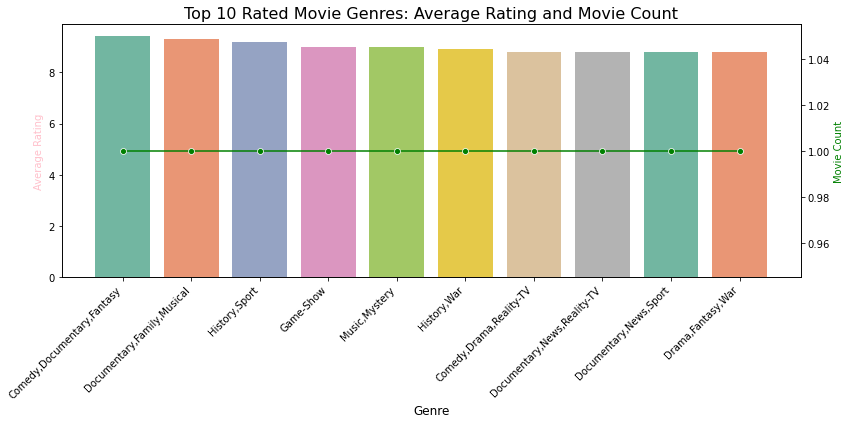

In [22]:
# Find the top_10_rated_genres by highest rating, with highest number of votes and movie count
top_10_rated_genres= """ 
SELECT mb.genres, 
        AVG(mr.averagerating) AS avg_rating, 
        COUNT(DISTINCT mr.movie_id) AS movie_count
FROM movie_ratings mr
JOIN movie_basics mb USING(movie_id)
WHERE mr.averagerating > 6
GROUP BY mb.genres
ORDER BY avg_rating DESC, movie_count DESC
LIMIT 10;"""
top_10_rated_genres = pd.read_sql(top_10_rated_genres, conn)

# Set up the plot size and style
plt.figure(figsize=(12, 6))
#sns.set(style="whitegrid")

# Create a single axis (ax) for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting average rating on the primary y-axis (left)
sns.barplot(x='genres', y='avg_rating', data=top_10_rated_genres, ax=ax1, palette='Set2')

# Create a secondary axis for movie count (right)
ax2 = ax1.twinx()
sns.lineplot(x='genres', y='movie_count', data=top_10_rated_genres, ax=ax2, color='green', marker='o')

# Labels
ax1.set_ylabel('Average Rating', color='pink')
ax2.set_ylabel('Movie Count', color='green')
plt.title('Top 10 Rated Movie Genres: Average Rating and Movie Count', fontsize=16)
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_xticklabels(top_10_rated_genres['genres'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

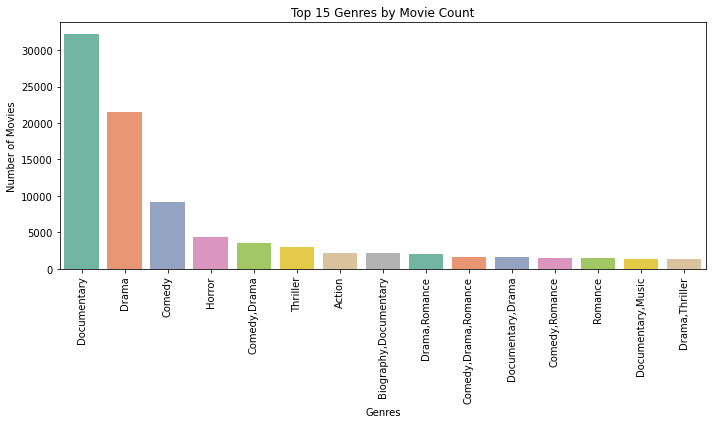

In [23]:
# Top 15 genres by movie_count
top_15_genres = """ SELECT genres, COUNT(DISTINCT movie_id) AS genre_count
FROM movie_basics
GROUP BY genres
ORDER BY genre_count DESC
LIMIT 15;"""
top_15_genres = pd.read_sql(top_15_genres, conn)
top_15_genres

# Plot barplot of the genre count
plt.figure(figsize=(10,6))
ax= sns.barplot(y='genre_count', x='genres', data=top_15_genres, palette='Set2')
        
plt.title('Top 15 Genres by Movie Count')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()